$$
\dot{x} = -0.04 x + 10^4 yz
$$

$$
\dot{y} = 0.04 x - 10^4 yz - 3e7 y^2
$$

$$
\dot{z} = 3e7 y^2
$$

Assignment: Exercise 2 from worksheet, just use commercial solvers solve_ivp and odeint from scipy.integrate

6:56 PM
and stiffness ratio

m = 1

c = 1001

k = 1000

$$
m\ddot{x} +c\dot{x} + kx = 0
$$

$$
\dot{x} = y
$$

$$
\dot{y} = -kx - cy
$$

$$Jacobian = \begin{pmatrix}
0 & 1\\
-k & -c
\end{pmatrix}$$


In [2]:
import numpy as np
import matplotlib.pyplot as plt


c = 1001
k = 1000
def Jacob2D(yvec):
  x = yvec[0]
  y = yvec[1]
  return np.array([[0,1],[-c,-k]])

In [4]:
IC = np.array([0,0])
J = Jacob2D(IC)
print(J)

[[    0     1]
 [-1001 -1000]]


In [5]:
lam = np.linalg.eigvals(J)
SR = np.max(np.abs(lam))/np.min(np.abs(lam))
print(SR)

996.9999959920511


In [13]:
from scipy.integrate import solve_ivp
from scipy.integrate import odeint

c = 1001
k = 1000

def SHO(t,yvec):
  x = yvec[0]
  y = yvec[1]
  return np.array([y,-c*x-k*y])
  
def SHOALT(yvec,t):
  x = yvec[0]
  y = yvec[1]
  return np.array([y,-c*x-k*y])
  
y0 = [1,0]
tspan = [0,10]
t_eval = np.linspace(tspan[0],tspan[1],1000)
sol = solve_ivp(SHO,tspan,y0,dense_output=True,
                t_eval = np.linspace(tspan[0],tspan[1],1000))

sol_odeint = odeint(SHOALT,y0,t_eval,rtol=1.0e-10,atol=1.0e-10)

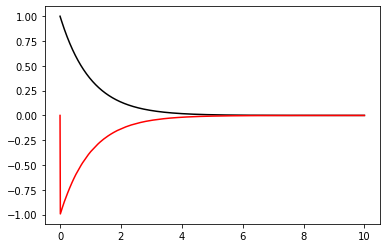

In [14]:
plt.plot(sol.t,sol.y[0],color='black')
plt.plot(sol.t,sol.y[1],color='red')
plt.show()

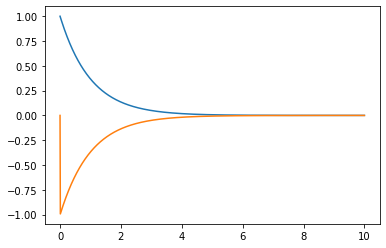

In [15]:
plt.plot(t_eval,sol_odeint[:,0])
plt.plot(t_eval,sol_odeint[:,1])
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

$$
J = \begin{bmatrix}
-0.04 & 10^4 z & 10^4 y \\
0.04 & (-10^4 z -6e7 y) & -10^4 y \\
0 & 6e7 y & 0
\end{bmatrix}
$$

In [ ]:
def Jacob(yvec):
  x = yvec[0]
  y = yvec[1]
  z = yvec[2]
  return np.array([[-0.04,        1.0e4*z     ,  1.0e4*y],
                   [0.04 , -(1.0e4*z+6.0e7*y) , -1.0e4*y],
                   [0    ,         6.0e7*y,         0   ]])

In [ ]:
y0 = np.array([0.5,.000000001,0.5])

In [ ]:
J = Jacob(y0)
print(J)

[[-4.00000e-02  5.00000e+03  1.00000e-05]
 [ 4.00000e-02 -5.00006e+03 -1.00000e-05]
 [ 0.00000e+00  6.00000e-02  0.00000e+00]]


In [ ]:
lam = np.linalg.eigvals(J)
SR = np.max(np.abs(lam))/np.min(np.abs(lam))
print(SR)

2.0595119623837126e+22


In [ ]:
np.abs(lam)

array([5.00010000e+03, 2.42780819e-19, 4.80110397e-07])

$$
\dot{x} = v
$$

$$
\dot{v} = - x -1.0\times 10^{-3} v
$$

$$
J = \begin{bmatrix}
0 & 1 \\
-1 & -1.0e-3
\end{bmatrix}
$$

In [ ]:
np.linalg.eigvals(np.array([[0,1],[-1,-1.0e-3]]))

array([-0.0005+0.99999987j, -0.0005-0.99999987j])

$$
\dot{x} = -0.04 x + 10^4 yz
$$

$$
\dot{y} = 0.04 x - 10^4 yz - 3e7 y^2
$$

$$
\dot{z} = 3e7 y^2
$$

In [ ]:
from scipy.integrate import solve_ivp

def Robertson(t,yvec):
  x = yvec[0]
  y = yvec[1]
  z = yvec[2]
  return np.array([-0.04*x+1.0e4*y*z,
                   0.04*x-1.0e4*y*z-3.0e7*y*y,
                   3e7*y*y])
  
y0 = [1,0,0]
tspan = [0,1000]
sol = solve_ivp(Robertson,tspan,y0,dense_output=True,
                t_eval = np.linspace(tspan[0],tspan[1],1000),atol=1.0e-13,rtol=1.0e-13)

KeyboardInterrupt: ignored

In [ ]:
plt.plot(sol.t,sol.y[0],color='black')
plt.plot(sol.t,sol.y[1],color='red')
plt.plot(sol.t,sol.y[2],color='blue')
plt.show()

NameError: ignored

In [ ]:
from scipy.integrate import solve_ivp

def SHO(t,yvec):
  x = yvec[0]
  y = yvec[1]
  return np.array([y,
                   -x])
  
y0 = [1,0]
tspan = [0,10]
sol = solve_ivp(SHO,tspan,y0,dense_output=True,
                t_eval = np.linspace(tspan[0],tspan[1],1000))

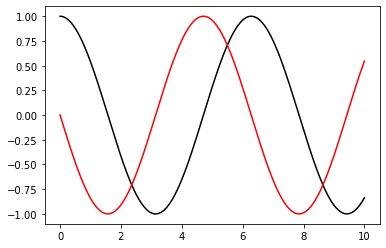

In [ ]:
plt.plot(sol.t,sol.y[0],color='black')
plt.plot(sol.t,sol.y[1],color='red')
plt.show()

In [ ]:
import copy

y0 = np.array([1,0,0])
h = 0.00001
t_final = 0.01
t = 0

y = y0


def Robertson(yvec,t):
  x = yvec[0]
  y = yvec[1]
  z = yvec[2]
  return np.array([-0.04*x+1.0e4*y*z,
                   0.04*x-1.0e4*y*z-3.0e7*y*y,
                   3e7*y*y])
  
def Jacob(yvec):
  x = yvec[0]
  y = yvec[1]
  z = yvec[2]
  return np.array([[-0.04,        1.0e4*z     ,  1.0e4*y],
                   [0.04 , -(1.0e4*z+6.0e7*y) , -1.0e4*y],
                   [0    ,         6.0e7*y,         0   ]])
  
def F(ynew,y,t,f,h):
  return ynew - y - h*f(ynew,t)

def JacF(Jacf,y,h):
  return np.eye(3)-h*Jacf(y)

while (t<t_final):
  print((t,y))
  ynew = y + Robertson(y,t)*h
  for i in range(0,1000):
    yold = copy.copy(ynew)
    ynew = y - np.linalg.inv(JacF(Jacob,ynew,h))@F(ynew,y,t,Robertson,h)
    for j in range(0,3):
      if(ynew[j]<0):
        ynew[j] = -0.5*ynew[j]
    delta = np.max(np.abs(ynew-yold))
    if(delta<1.0e-8):
      break

  y = ynew
  t += h



(0, array([1, 0, 0]))
(1e-05, array([9.99999600e-01, 3.99983841e-07, 1.59948687e-11]))
(2e-05, array([9.99999200e-01, 8.25418636e-07, 1.80268707e-11]))
(3.0000000000000004e-05, array([9.99998800e-01, 1.25066903e-06, 1.80062180e-11]))
(4e-05, array([9.99998400e-01, 1.67561236e-06, 1.79752424e-11]))
(5e-05, array([9.99998000e-01, 2.10012632e-06, 1.79340057e-11]))
(6e-05, array([9.99997600e-01, 2.52408911e-06, 1.78825908e-11]))
(7.000000000000001e-05, array([9.99997200e-01, 2.94737957e-06, 1.78211022e-11]))
(8e-05, array([9.99996800e-01, 3.36987733e-06, 1.77496648e-11]))
(9e-05, array([9.99996400e-01, 3.79146298e-06, 1.76684237e-11]))
(0.0001, array([9.99996000e-01, 4.21201821e-06, 1.75775436e-11]))
(0.00011, array([9.99995600e-01, 4.63142592e-06, 1.74772083e-11]))
(0.00012, array([9.99995200e-01, 5.04957041e-06, 1.73676195e-11]))
(0.00013000000000000002, array([9.99994800e-01, 5.46633748e-06, 1.72489964e-11]))
(0.00014000000000000001, array([9.99994400e-01, 5.88161455e-06, 1.71215747e-11

KeyboardInterrupt: ignored